This is First table
       Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986               

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


This is Second table
  0        Finland
1        Denmark
2         Norway
3        Iceland
4    Netherlands
5    Switzerland
6         Sweden
7    New Zealand
8         Canada
9        Austria
Name: Country or region, dtype: object

The Sum value for the happiness score is: 843.4970000000001

The Maximum value for the happiness score is: 7.769

The Mean value of happiness is:  5.4070320512820516

The Median value for the happiness score is: 5.3795

The Mode value for the happiness score is: 0    5.208
dtype: float64

The Correlation between different variables of happiness is as follows
                               Overall rank     Score  GDP per capita  \
Overall rank                      1.000000 -0.989092       -0.802983   
Score                            -0.989092  1.000000        0.795287   
GDP per capita                   -0.802983  0.795287        1.000000   
Social support                   -0.767876  0.777333        0.757348   
Healthy life expectancy          -0.787574  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

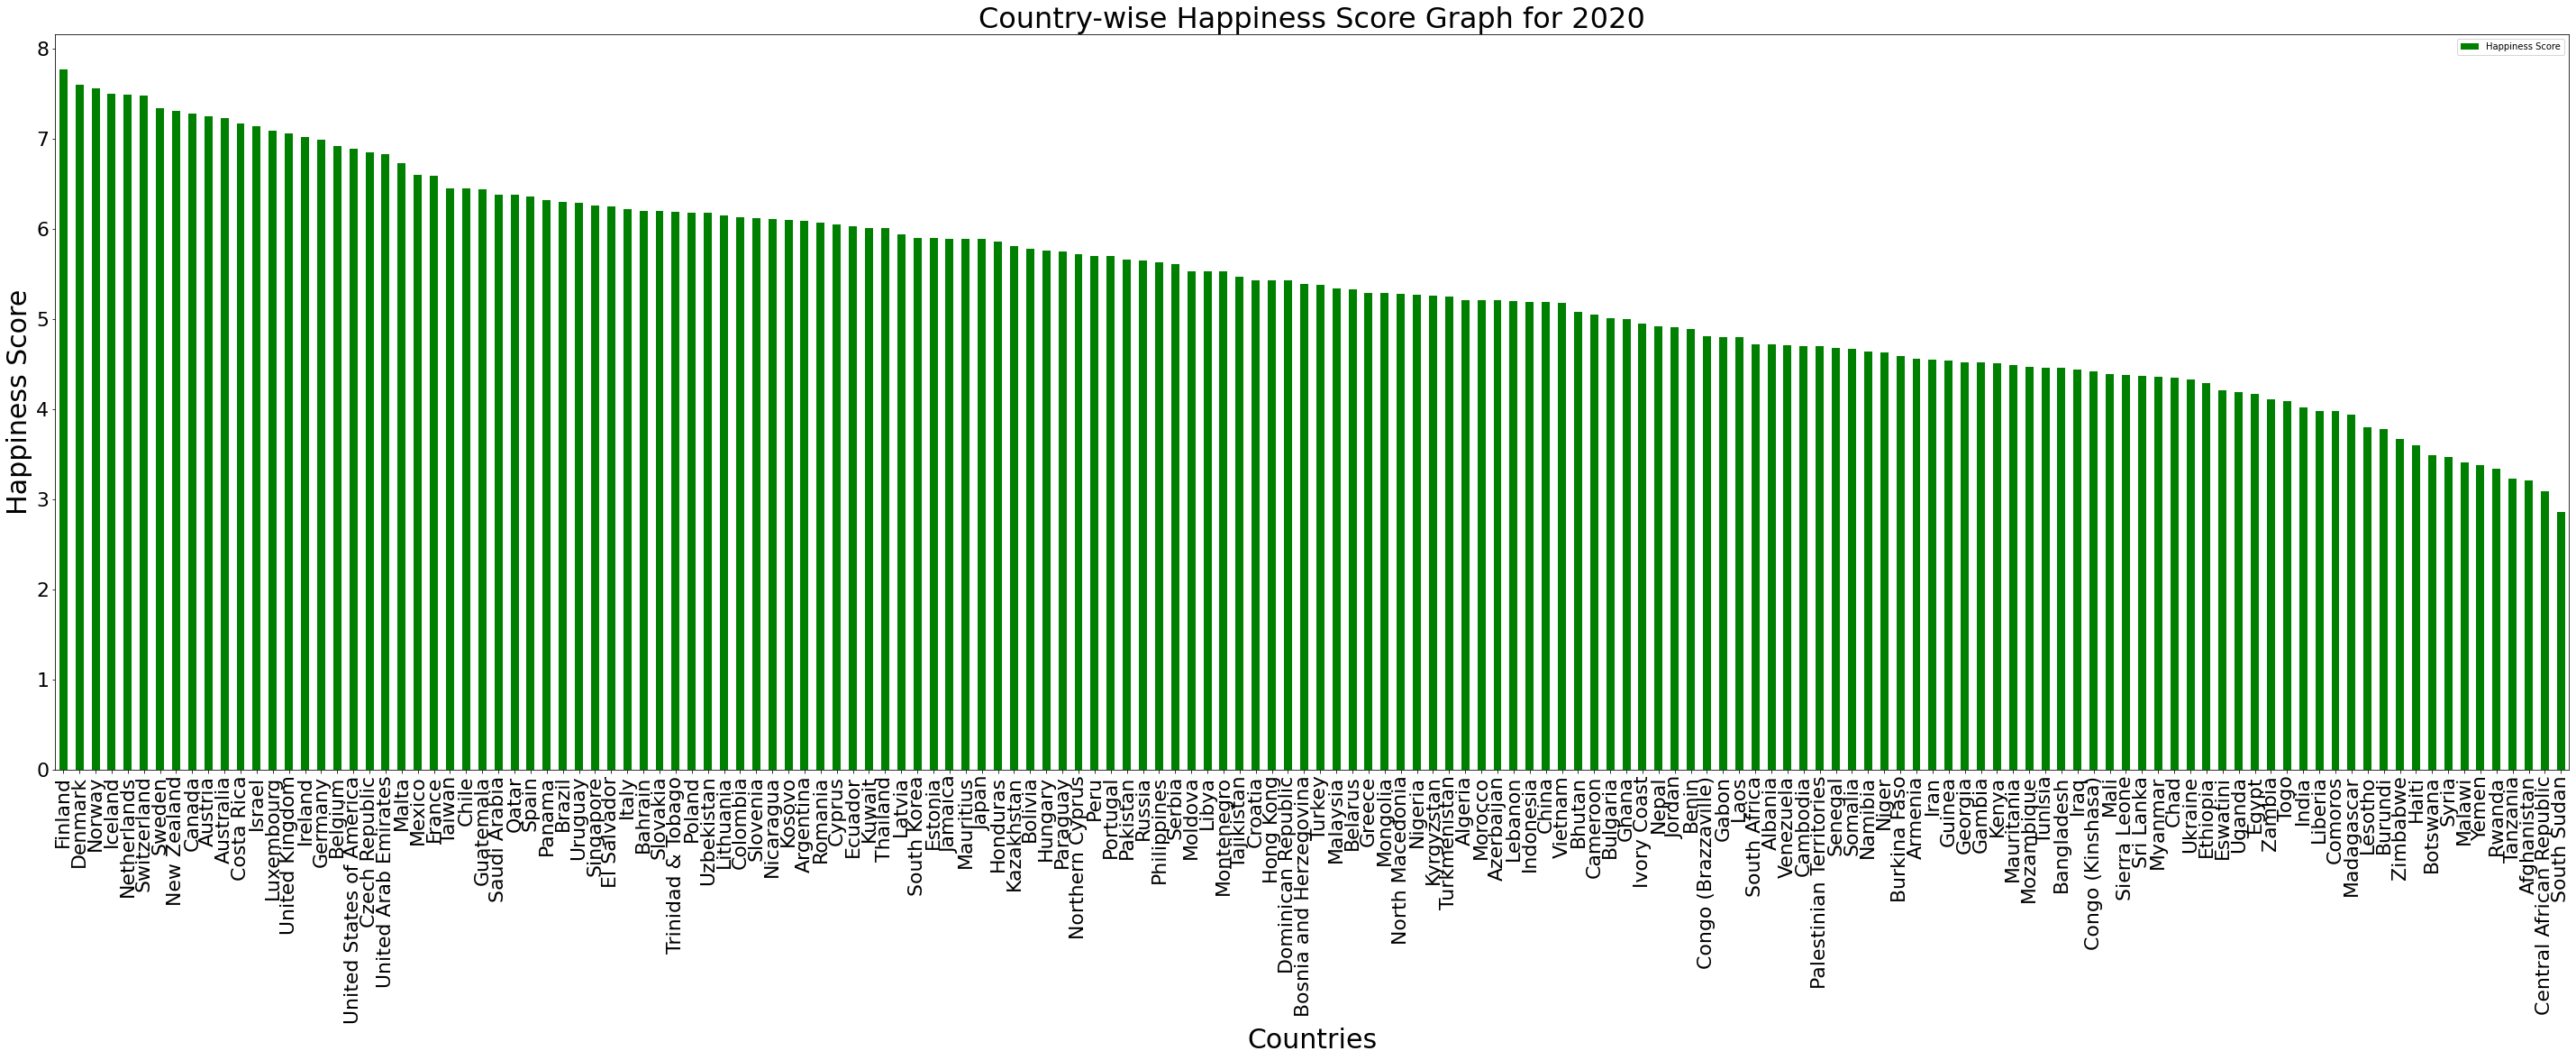

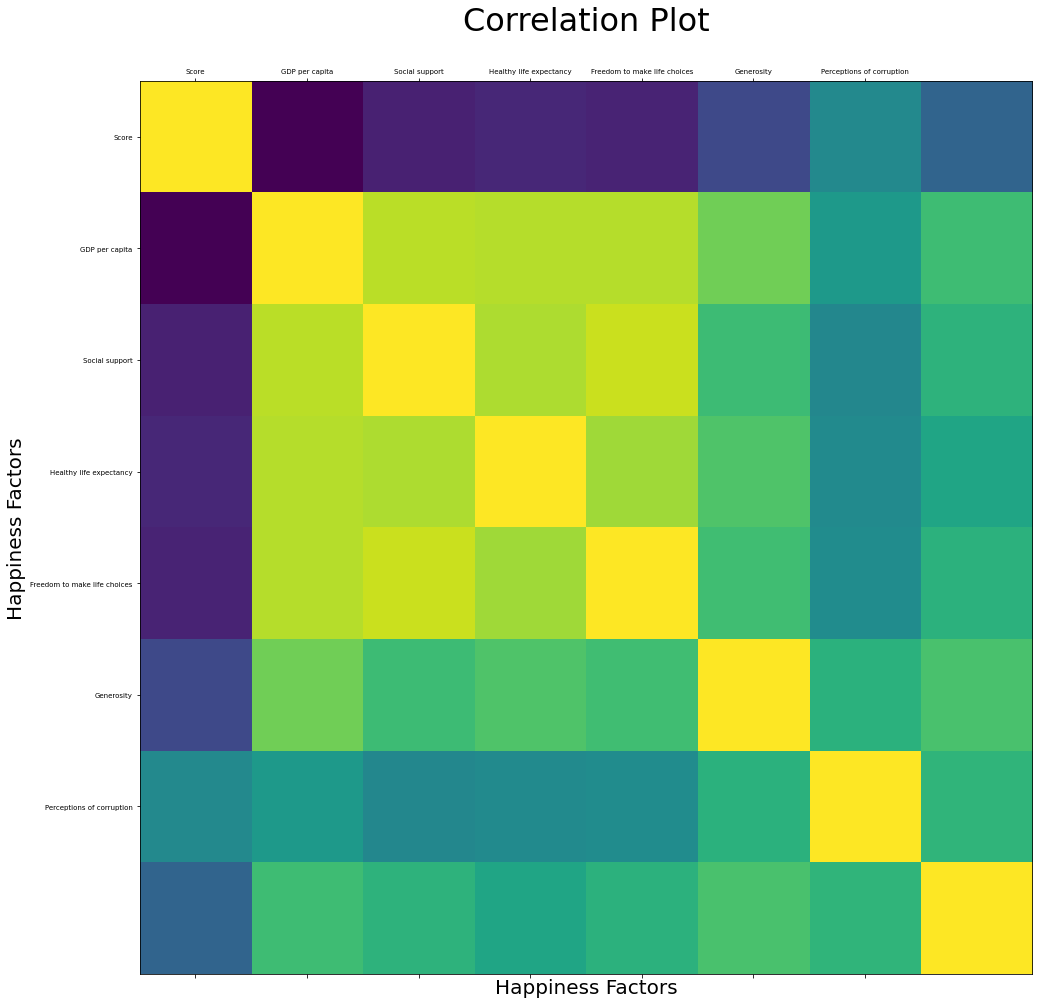

In [1]:
# Ran the code using GOOGLE COLAB

# Covered requirements: 
# It must pull data from the internet (typically webpages) 
# It must pull data from 5 different webpages (using pandas) -- This is 2nd page
# It must do some basic calculations on numerical data from 3 of those pages (mean, median, mode, min, max) 
# It must make use of your own methods where appropriate 
# It must produce at least 3 charts from 3 of those pages 
# It must save the data to a file 


# Covered Additional requirements 
# The 5 webpages are from 5 different websites 
# It does basic calculations on all 5 of those webpages 
# It uses BeautifulSoup on 1 of the webpages and parses the html -- This is 1st page using bs4
# It produces 5 charts from all 5 of the webpages 
# It saves the charts in addition to the data, to image files 


import pandas as pd
import requests
import bs4 as bs
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import plotly.express as px
from google.colab import files


URL = 'https://en.wikipedia.org/wiki/World_Happiness_Report#2020_report'
REQUEST = requests.get(URL)
RESPONSE = REQUEST.text
soup = bs.BeautifulSoup(RESPONSE,'html.parser')


# Collecting information from table with happiness score and other details for the year 2020
table = soup.find_all('table',attrs={'class':'wikitable sortable'})
dataframe = pd.read_html(str(table))[2]
print("This is First table\n ", dataframe)                                      #Displaying the primary dataframe

dataframe.to_csv('dataframe.csv')                                               #Save Frist Table to CSV
files.download('dataframe.csv')                                                 #Download Frist Table to CSV

top10_happiest_countries=dataframe['Country or region'][:10]                    #Computing top 10 happiest countries.

top10_happiest_countries.to_csv('top10_happiest_countries.csv')                 #Save second Table to CSV
files.download('top10_happiest_countries.csv')                                  #Download second Table to CSV

print("\nThis is Second table\n ",top10_happiest_countries)                     #Displaying the top 10 countries



# Performing basic operations on the First Table 

sum = dataframe.loc[:,"Score"].sum()
print("\nThe Sum value for the happiness score is:", sum)

maximum = dataframe.loc[:,"Score"].max()
print("\nThe Maximum value for the happiness score is:", maximum)

mean = dataframe['Score'].mean()
print("\nThe Mean value of happiness is: ", mean)

median = dataframe.loc[:,"Score"].median()
print("\nThe Median value for the happiness score is:", median)

mode = dataframe.loc[:,"Score"].mode()
print("\nThe Mode value for the happiness score is:", mode)

correlation = dataframe.corr()
print("\nThe Correlation between different variables of happiness is as follows\n", correlation)


# Plotting the distribution for happiness score per country with the below graph properties
ax=dataframe.plot(x='Country or region',y='Score',color='green',kind='bar',figsize=(50,15),label='Happiness Score',legend=True,fontsize=22)
ax.set_title("Country-wise Happiness Score Graph for 2020",fontsize=32)
ax.set_xlabel("Countries",fontsize=30)
ax.set_ylabel("Happiness Score",fontsize=30)
plt.savefig('graph2-1.png')                                                     #Saving the Frist graph
files.download('graph2-1.png')                                                  #Downloading the First graph


# Plotting the correlation plot with below graph properties
f = plt.figure(figsize=(16, 16))
plt.matshow(correlation, fignum=f.number)
columns_to_plot=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
plt.xticks(range(len(columns_to_plot)),columns_to_plot,fontsize=7)
plt.yticks(range(len(columns_to_plot)),columns_to_plot,fontsize=7)
plt.xlabel("Happiness Factors",fontsize=20)
plt.ylabel("Happiness Factors",fontsize=20)
plt.title("Correlation Plot",fontsize=32)
plt.savefig('graph2-2.png')                                                     #Saving the Second graph
files.download('graph2-2.png')                                                  #Downloading the Second graph
